# Groundwater geochemistry data in Central Valley

California’s central valley is one of the most productive agricultural regions of the world. Agricultural irrigation in these semi-arid agricultural regions heavily relys on the groundwater system. At the same time, with an increase in population, groundwater consumption is expected to increase. The result is that pumping from increasingly deeper parts of the aquifer has increased the rate of downward groundwater flow. This increasing gradient may enhance the concentration of geogenic contaminants, such as Chromium (Cr), Uranium (U) and Arsenic (As). 


**Landuse map in Central Valley**



![landuse.jpg](https://drive.google.com/uc?export=view&id=1M62JIu9cKtztoxiWIMILUQ3yrkxobtF8)

 

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# Load geochem dataset, groundwater chemistry in Central Valley
df = pd.read_csv('Datapoints-CentralValley-Groundwater-Jan2019.csv')

In [4]:
# preview the data
df.head()

,Latitude,Longitude,SOURCE,SOURCE.NAM,OTHER.NAME,WELL.ID,Al (ppb),As (ppb),Ba (ppb),Ca (ppb),...,Ni (ppb),NO3 (ppb),Pb (ppb),Se (ppb),SO4 (ppb),Sr (ppb),U (ppb),V (ppb),Zn (ppb),Cr_level
0,39.767667,-121.781556,USGS,CAMP-ES-15,CAMP-ES-15,CAMP-ES-15,2.6,0.79,8.62,17700,...,0.28,474,0.341,0.05,3410,135.0,0.117068,20.0,2.0,Group 0
1,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,6.6,1.20,43.10,24400,...,1.18,4390,2.690,0.05,7580,309.0,0.356680,7.0,26.1,Group 0
2,37.757111,-120.799278,USGS,CE-QPC-01,CE-QPC-01,CE-QPC-01,1.5,1.30,43.20,22800,...,0.20,4340,1.130,0.08,10500,316.0,0.307840,7.3,28.6,Group 0
3,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,3.4,21.90,154.00,9430,...,0.20,238,0.040,0.09,3450,115.0,0.156880,3.0,6.8,Group 0
4,38.287528,-121.328972,USGS,COS-08,COS-08,COS-08,1.3,21.50,152.00,9470,...,0.21,298,0.080,0.07,3080,126.0,0.281200,1.5,1.5,Group 0


## Contaminants level on the map

Text(0.5, 1.0, 'As (ppb)')

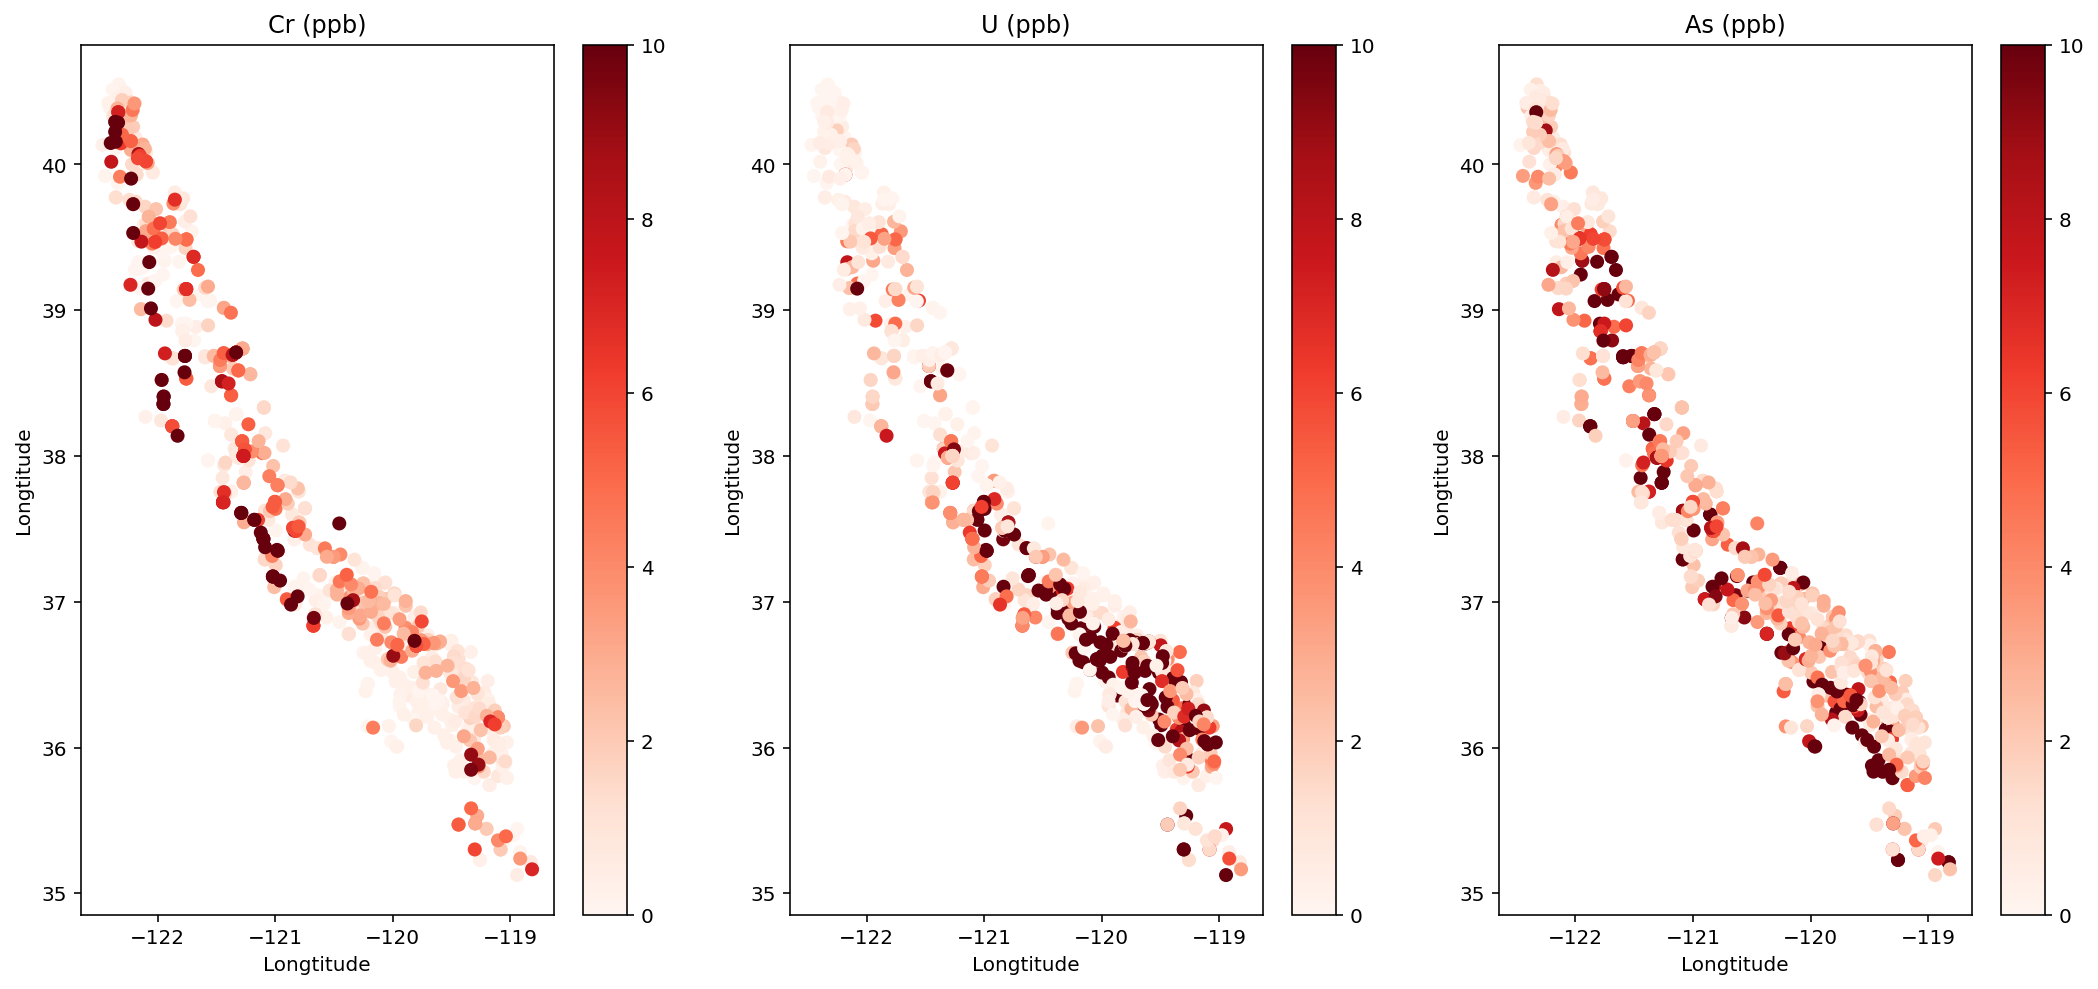

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,8))
data = df
plot1 = ax1.scatter(data['Longitude'],data['Latitude'],c = data['Cr (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot1,ax=ax1)
ax1.set_xlabel('Longtitude')
ax1.set_ylabel('Longtitude')
ax1.set_title('Cr (ppb)')
plot2 = ax2.scatter(data['Longitude'],data['Latitude'],c = data['U (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot2,ax=ax2)
ax2.set_xlabel('Longtitude')
ax2.set_ylabel('Longtitude')
ax2.set_title('U (ppb)')
plot3 =ax3.scatter(data['Longitude'],data['Latitude'],c = data['As (ppb)'],cmap = 'Reds',vmin = 0, vmax = 10)
plt.colorbar(plot3,ax=ax3)
ax3.set_xlabel('Longtitude')
ax3.set_ylabel('Longtitude')
ax3.set_title('As (ppb)')

## Make maps with an important log-ratio

Text(0.5, 1.0, 'log(As/NO3)')

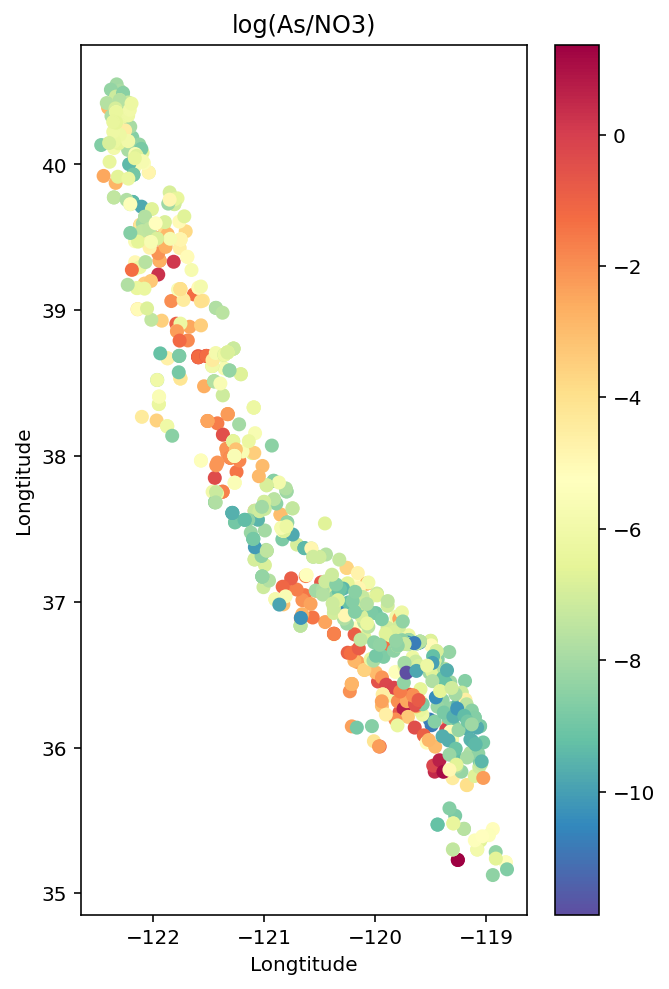

In [6]:
fig,ax = plt.subplots(1, 1, figsize = (5,8))

################################################
#Change log-ratios and its name by yourself
################################################

log_ratios = np.log(data['As (ppb)']/data['NO3 (ppb)'])
name = 'log(As/NO3)'

plot1 = ax.scatter(data['Longitude'],data['Latitude'], c = log_ratios,cmap = 'Spectral_r')
plt.colorbar(plot1,ax=ax)
ax.set_xlabel('Longtitude')
ax.set_ylabel('Longtitude')
ax.set_title(name)


## PCA analysis

In [7]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from skbio.stats.composition import clr, ilr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'PC score 2')

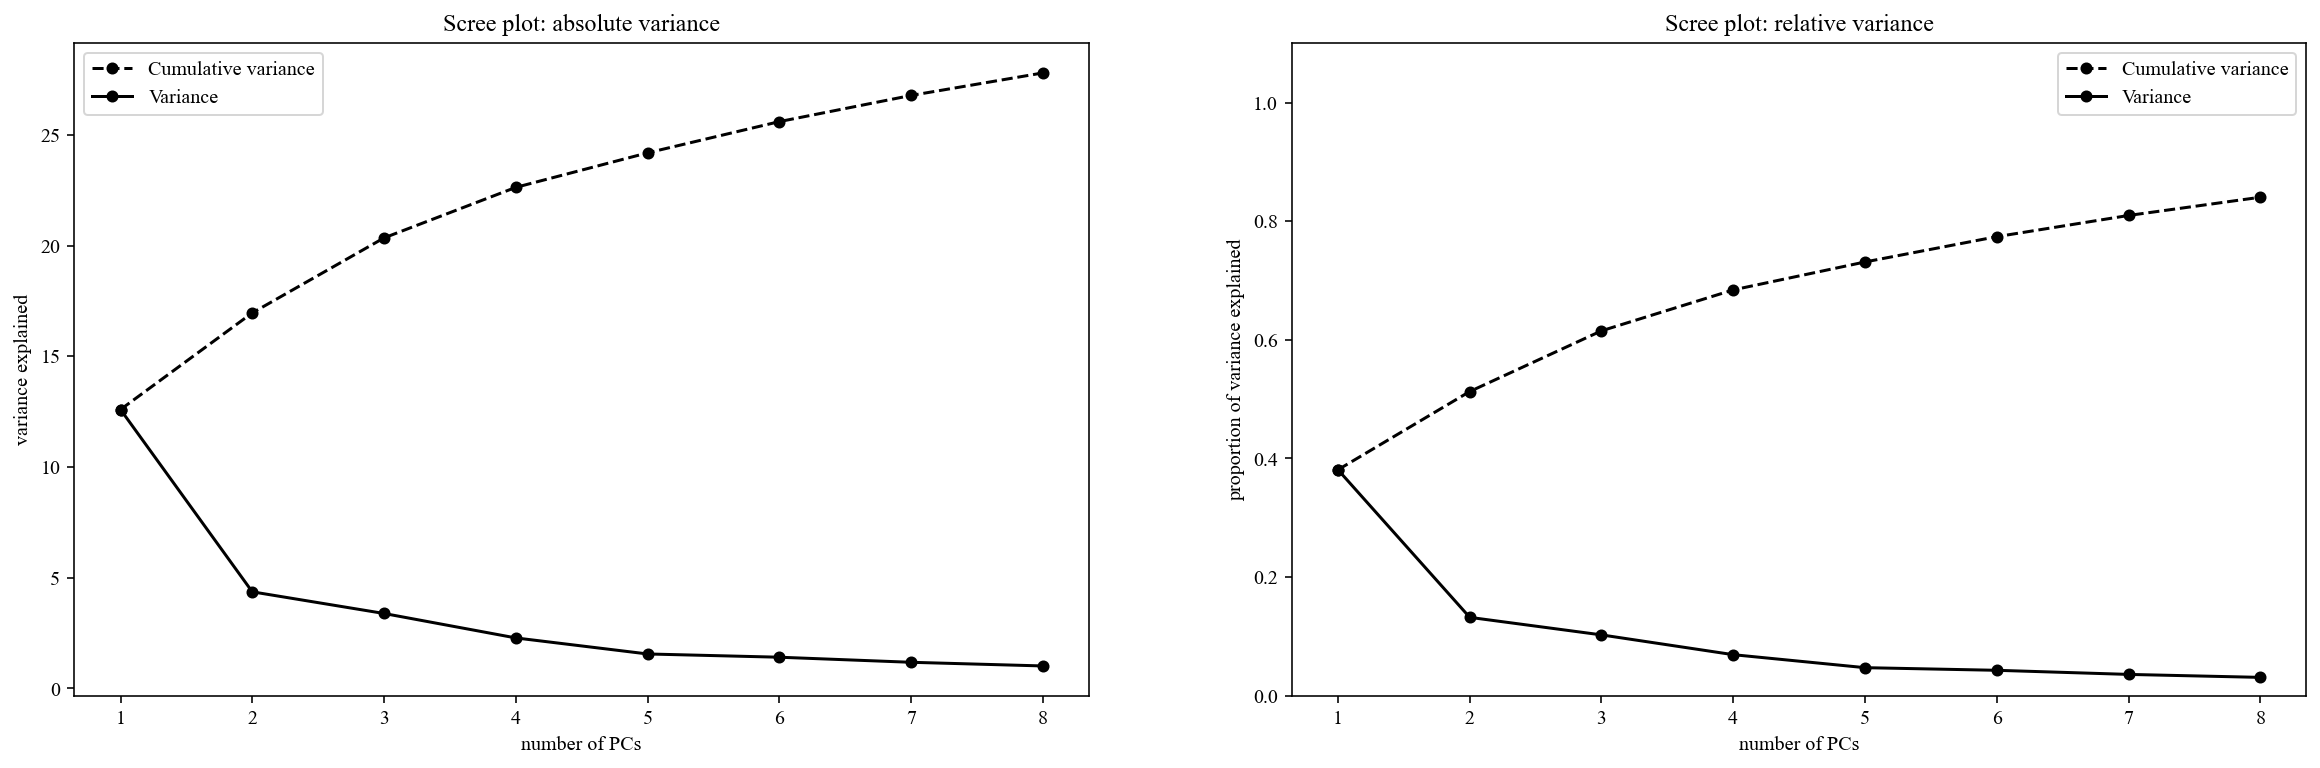

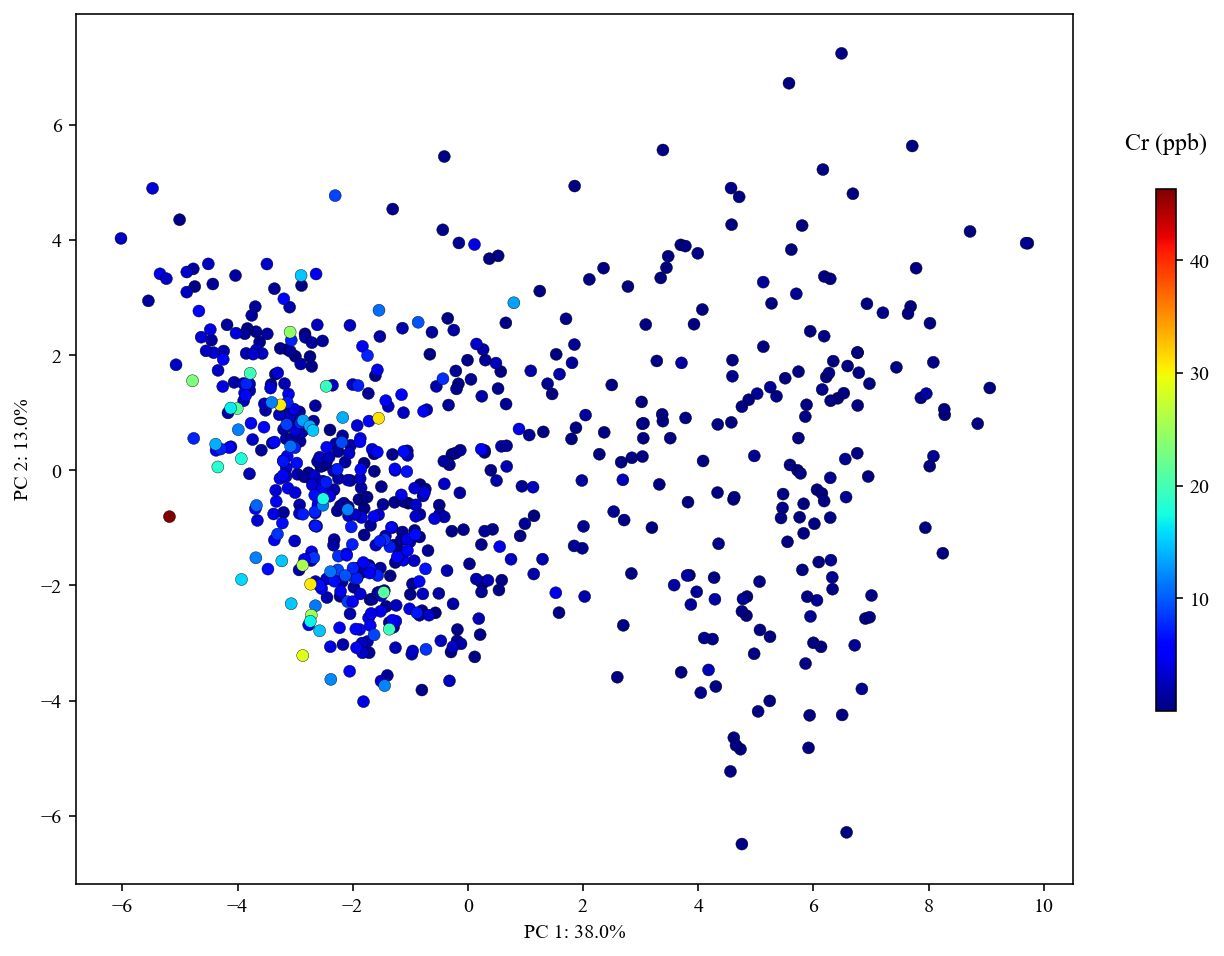

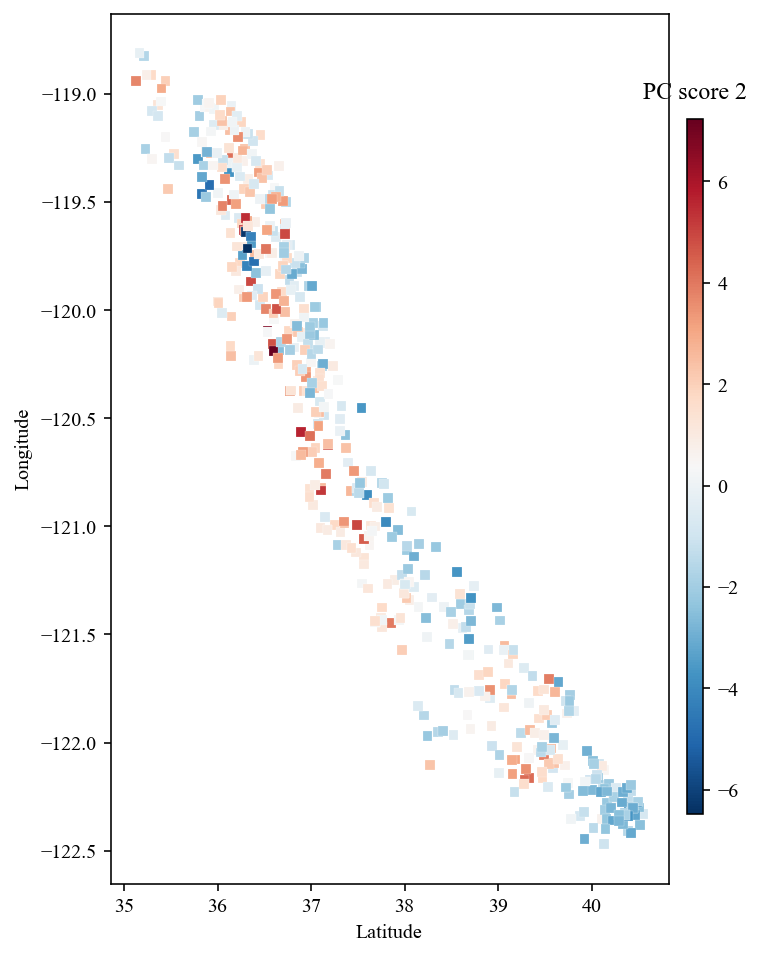

In [8]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

compositional_data = np.array(df.values[:,6:26],dtype = 'float64')
columns_name = df.columns[6:26].tolist()

# # Data transformation
clr_compositional_data = clr(compositional_data)
ilr_compositional_data = ilr(compositional_data)

# Scale data
scaler = StandardScaler(with_std=False)
clr_compositional_data_scale = scaler.fit_transform(clr_compositional_data)
ilr_compositional_data_scale = scaler.fit_transform(ilr_compositional_data)


def ilr_clr(clr_data):
    D = clr_data.shape[1]
    V = np.zeros((D,D-1))
    for i in np.arange(1,D):
        V_i = np.zeros(D)
        V_i[:i] = 1/i
        V_i[i] = -1
        V_i = V_i*np.sqrt(i/(i+1))
        V[:,i-1] = V_i
    return V

V = ilr_clr(clr_compositional_data_scale)

n_pcs = 8
pca = PCA(n_components=n_pcs)
pca.fit(ilr_compositional_data_scale)
X = pca.transform(ilr_compositional_data_scale)

pca_components_clr_space = np.dot(pca.components_, V.T) # from ilr to clr space


matplotlib.rc("figure", figsize=(20,6))
ax = plt.subplot(1, 2, 2)

plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_.cumsum(), \
          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative variance')
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_ratio_, \
          marker='o', markersize=5, color='k', label='Variance')
plt.xlabel('number of PCs')
plt.ylabel('proportion of variance explained')
plt.xticks(np.arange(1,X.shape[1]+1,1))
plt.ylim(0,1.1)
plt.legend()
plt.title('Scree plot: relative variance')

ax = plt.subplot(1, 2, 1)
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_.cumsum(), \
          marker='o', markersize=5, linestyle = 'dashed', color='k', label='Cumulative variance')
plt.plot(np.arange(1,X.shape[1]+1), pca.explained_variance_, \
          marker='o', markersize=5, color='k', label='Variance')
plt.xlabel('number of PCs')
plt.ylabel('variance explained')
plt.xticks(np.arange(1,X.shape[1]+1,1))
plt.legend()
plt.title('Scree plot: absolute variance')

fig = plt.figure(figsize=(10,8))
ax = plt.subplot()
im = ax.scatter(
    X[:,0], 
    X[:,1],  
    c=df['Cr (ppb)'], 
    cmap = 'jet', edgecolor='k', linewidth=0.2
    )
plt.xlabel('PC 1: '+str(np.round(pca.explained_variance_ratio_[0]*100))+'%')
plt.ylabel('PC 2: '+str(np.round(pca.explained_variance_ratio_[1]*100))+'%')
ax.set_aspect('equal')
pos = ax.get_position()
cb_ax = fig.add_axes([pos.x0+0.75, pos.y0+0.15, pos.width*0.02, pos.height*0.6])
cb = plt.colorbar(im, cax=cb_ax, orientation="vertical")
cb.ax.set_title('Cr (ppb)', pad=20)
# plt.savefig('fig_f1_vs_f2.png', bbox_inches="tight", dpi=300)  



fig,ax = plt.subplots(1, 1, figsize = (5,8))
ax = plt.subplot()
im = ax.scatter(
    df['Latitude'], df['Longitude'], c=X[:,1], cmap='RdBu_r', 
    s=24, marker='s', edgecolor='w', linewidth=0.1)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.ticklabel_format(axis='both', useOffset=False, style='plain')
pos = ax.get_position()
cb_ax = fig.add_axes([pos.x0+0.8, pos.y0+0.06, pos.width*0.03, pos.height*0.8])
cb = plt.colorbar(im, cax=cb_ax, orientation="vertical")
cb.ax.set_title('PC score 2', pad=10)

## Clustering

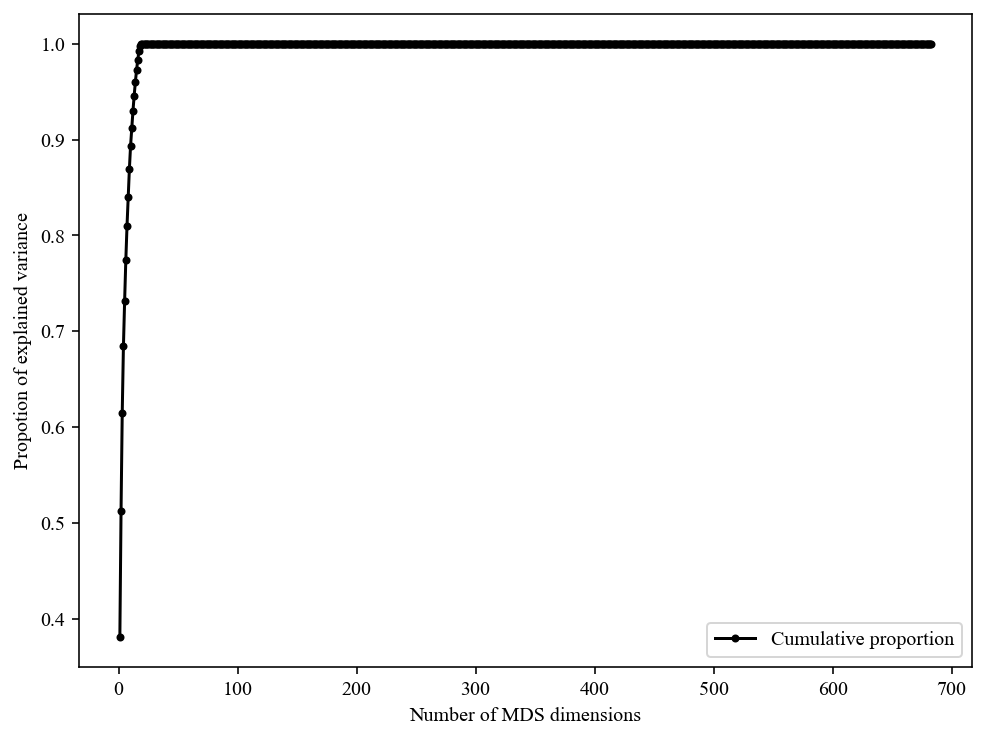

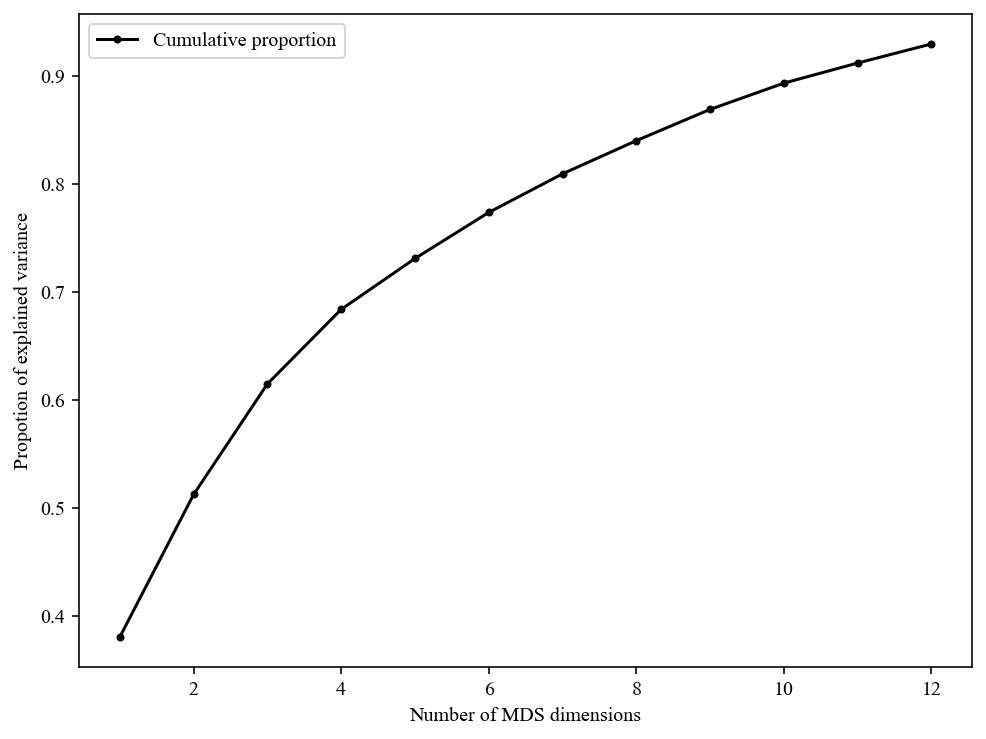

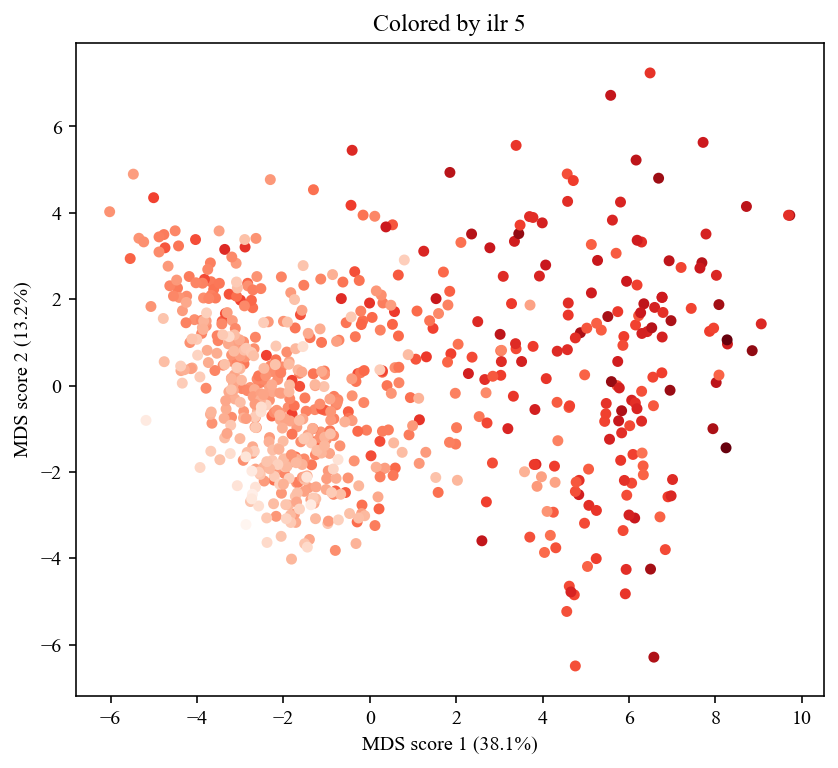

In [9]:
# =============================================================================
from scipy.spatial import distance_matrix
def classical_MDS(X):
    # Input
    # X is n by p matrix, n is the number of samples, p is the number of compositions/variables

    D = distance_matrix(X, X) # Euclidean distance
    n = len(D)
    C = np.eye(n) - np.ones((n, n))/n
    B = -C.dot(D**2).dot(C)/2
    u,s,v = np.linalg.svd(B)

    mds =  np.dot(u,np.diag(np.sqrt(s)))

    return mds, s

# Scree plot
mds, s = classical_MDS(ilr_compositional_data_scale)


plt.figure(figsize=[8,6])
plt.plot(np.arange(1,len(s)+1), np.cumsum(s)/np.sum(s), '.-', color='k', label='Cumulative proportion')
plt.xlabel('Number of MDS dimensions')
plt.ylabel('Propotion of explained variance')
plt.legend()
# plt.title('Scree plot')
plt.savefig('fig_mds_scree_plot.png', bbox_inches="tight", dpi=300)  



plt.figure(figsize=[8,6])
plt.plot(np.arange(1, 12+1), np.cumsum(s)[:12]/np.sum(s), '.-', color='k', label='Cumulative proportion')
plt.xlabel('Number of MDS dimensions')
plt.ylabel('Propotion of explained variance')
plt.legend()
# plt.title('Scree plot')
plt.savefig('fig_mds_scree_plot_2.png', bbox_inches="tight", dpi=300)  


plt.figure(figsize=[8,6])
plt.scatter(mds[:,0],mds[:,1], s=20, c=ilr_compositional_data_scale[:, 4], cmap='Reds')
plt.xlabel('MDS score 1 ({:.1f}%)'.format(100*s[0]/np.sum(s)))
plt.ylabel('MDS score 2 ({:.1f}%)'.format(100*s[1]/np.sum(s)))
plt.title('Colored by ilr 5')
plt.gca().set(aspect='equal')
plt.savefig('fig_mds_score_plot_ilr5.png', bbox_inches="tight", dpi=300)  

## RMD_outlier_detection

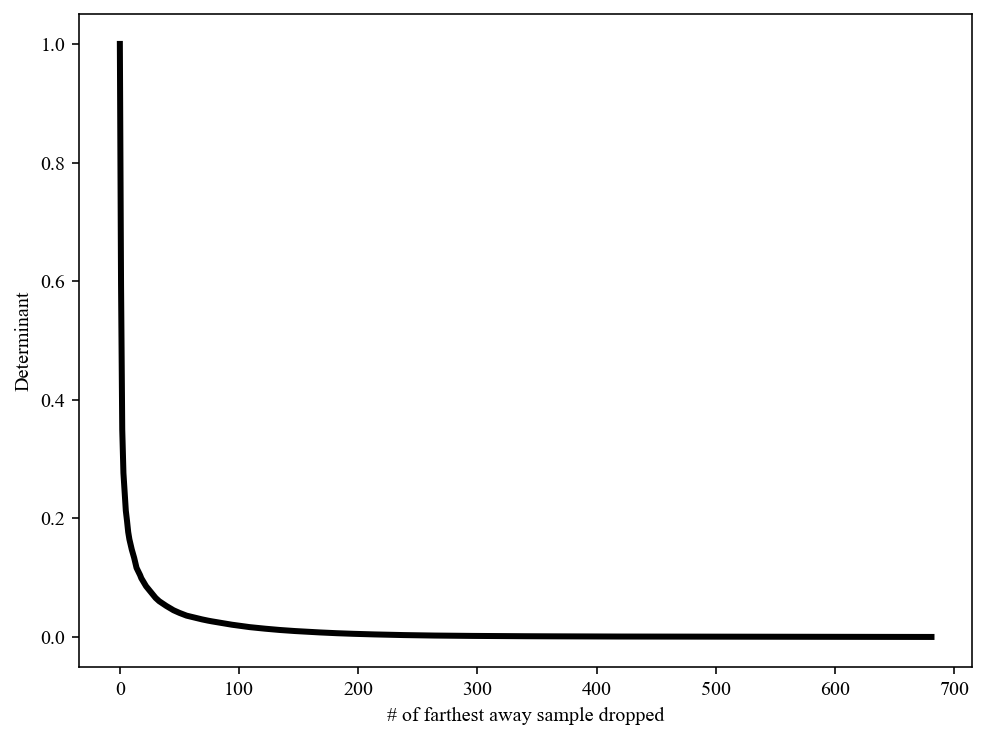

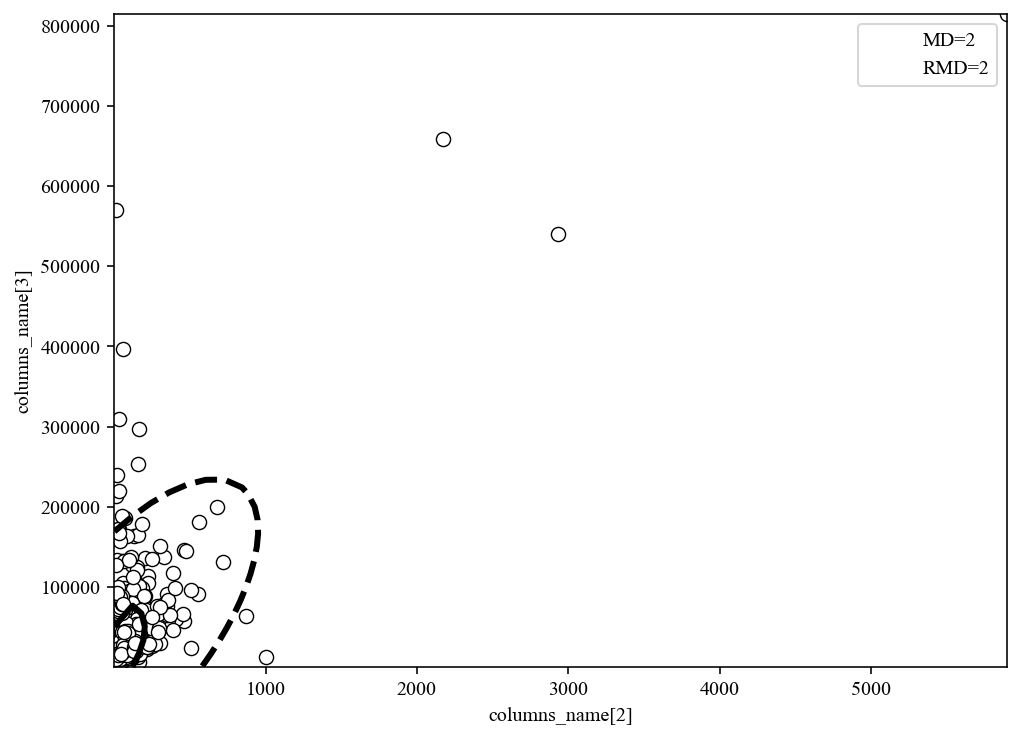

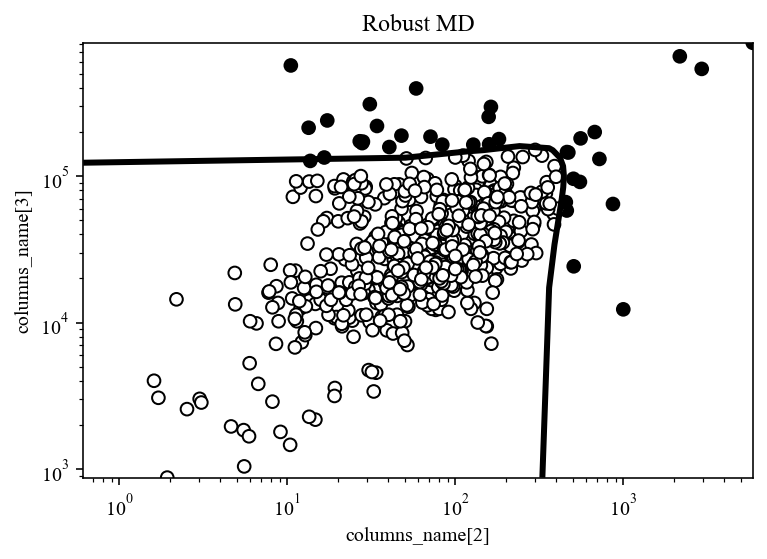

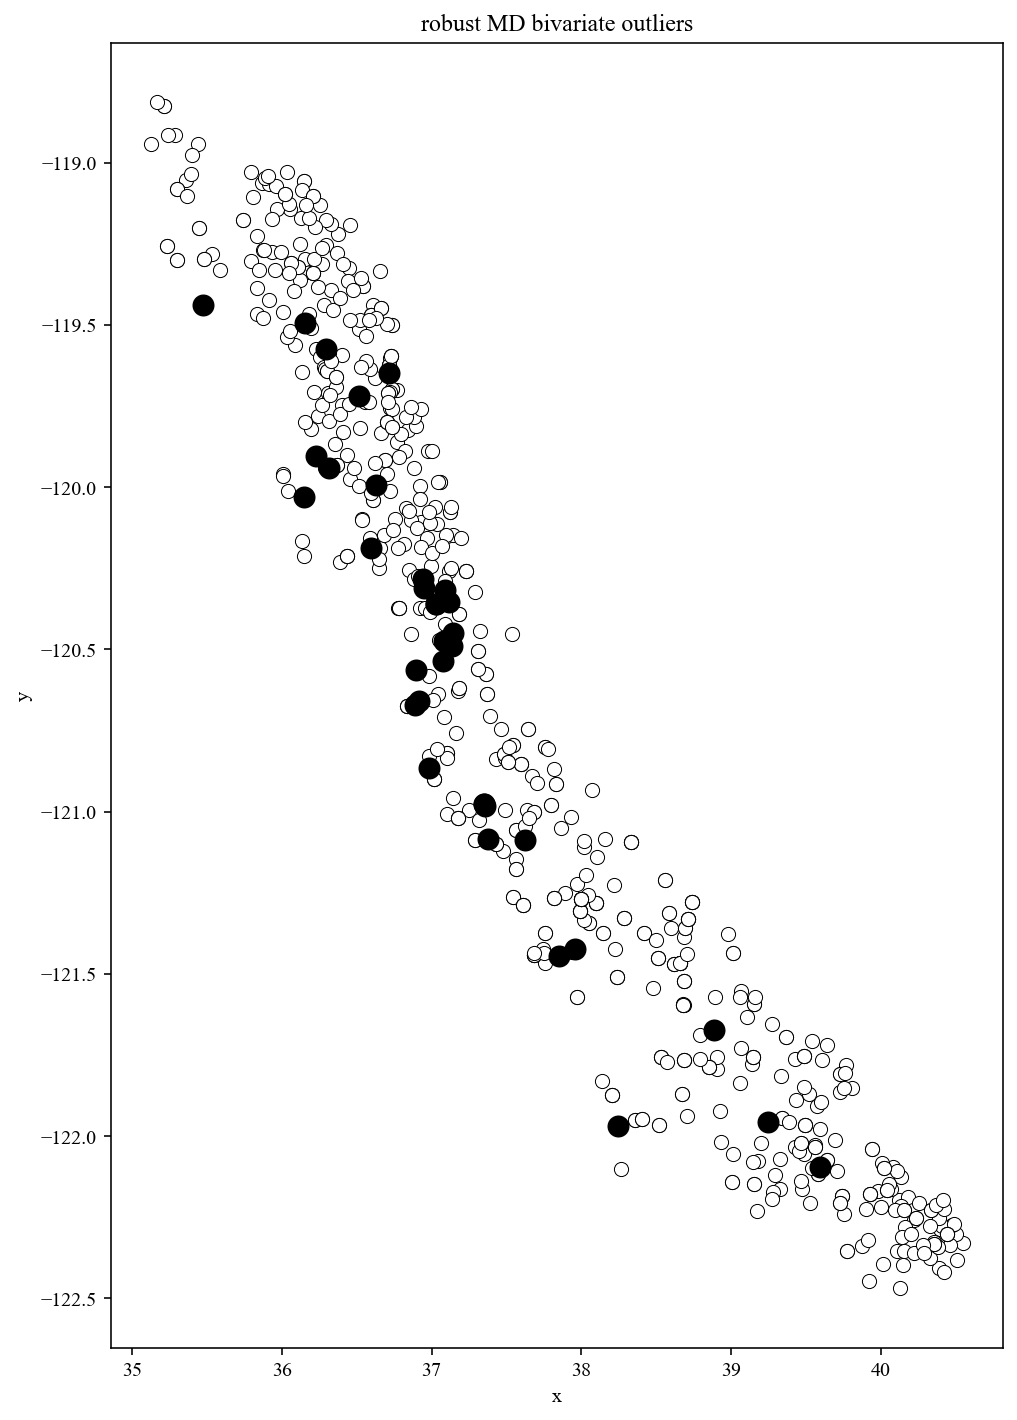

In [10]:
# Import dependencies
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.covariance import EmpiricalCovariance
from sklearn.covariance import MinCovDet

X = compositional_data[:,2:4]
## robust MD
rob_cov = MinCovDet().fit(X)
RMD = np.sqrt(rob_cov.mahalanobis(X))

## Determinant function 
cov_dets = []
RMD_sorted = np.sort(RMD)[::-1]

for outlier_id in range(len(X)-1):
  new_X = X[RMD<RMD_sorted[outlier_id]]
  new_cov = EmpiricalCovariance().fit(new_X).covariance_
  cov_dets.append(np.linalg.det(new_cov))

plt.figure(figsize=[8,6])
plt.plot(cov_dets/np.max(cov_dets), color = 'k',linewidth = 3)
# np.linalg.det(new_cov)
plt.xlabel('# of farthest away sample dropped')
plt.ylabel('Determinant')
plt.show()


## X data
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0])-1,np.max(X[:,0])+1),
                     np.linspace(np.min(X[:,1])-1,np.max(X[:,1])+1))
## empirical MD
emp_cov = EmpiricalCovariance().fit(X)
MD = np.sqrt(emp_cov.mahalanobis(X))
MD_contour = emp_cov.mahalanobis(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

## robust MD
rob_cov = MinCovDet().fit(X)
RMD = np.sqrt(rob_cov.mahalanobis(X))
RMD_contour = rob_cov.mahalanobis(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=[8,6])
plt.scatter(X[:,0], X[:,1],  s=50, c='w', edgecolor='k', linewidths=0.7)
a = plt.contour(xx, yy, np.sqrt(MD_contour), levels=[3], colors='k', linestyles = 'dashed', linewidths=3)
a.collections[0].set_label('MD=2')
b = plt.contour(xx, yy, np.sqrt(RMD_contour), levels=[3], colors='k',linewidths=3)
b.collections[0].set_label('RMD=2')
plt.legend(loc='upper right')

plt.xlabel('columns_name[2]')
plt.ylabel('columns_name[3]')
plt.show()



boundary = np.quantile(np.square(RMD),0.95)
outlier_index = (np.square(RMD)>= boundary)

plt.figure(figsize=[6,4])
plt.scatter(X[:,0], X[:,1], c=outlier_index,s = 40,edgecolors = 'k',cmap ='Greys')
a = plt.contour(xx, yy, np.sqrt(RMD_contour), levels=[np.sqrt(boundary)], colors='k',linewidths=3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('columns_name[2]')
plt.ylabel('columns_name[3]')
plt.title('Robust MD')
plt.show()



plt.figure(figsize=(8,12))
plt.scatter(df['Latitude'], df['Longitude'], c = 'w', edgecolors='k', linewidths=0.5, s=50)
plt.scatter(df['Latitude'][outlier_index],
            df['Longitude'][outlier_index],             
            c = 'k',s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('robust MD bivariate outliers')
plt.show()
